<a href="https://colab.research.google.com/github/KatrinFrimus/Introduction-to-cloud-computing/blob/main/Copy_of_HW2_bear_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests beautifulsoup4

In [2]:
!pip install firebase

In [3]:
!apt-get install wkhtmltopdf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  avahi-daemon bind9-host bind9-libs geoclue-2.0 glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas iio-sensor-proxy libavahi-core7 libavahi-glib1
  libdaemon0 libevdev2 libfontenc1 libgudev-1.0-0 libhyphen0 libinput-bin libinput10
  libjson-glib-1.0-0 libjson-glib-1.0-common liblmdb0 libmaxminddb0 libmbim-glib4 libmbim-proxy
  libmd4c0 libmm-glib0 libmtdev1 libnl-genl-3-200 libnotify4 libnss-mdns libproxy1v5 libqmi-glib5
  libqmi-proxy libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5 libqt5positioning5
  libqt5printsupport5 libqt5qml5 libqt5qmlmodels5 libqt5quick5 libqt5sensors5 libqt5svg5
  libqt5webchannel5 libqt5webkit5 libqt5widgets5 libsoup2.4-1 libsoup2.4-common libudev1
  libwacom-bin libwacom-common libwacom9 libwoff1 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libx

In [4]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import re

In [5]:
def fetch_page(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        return soup
    else:
        return None

In [6]:
def index_words(soup):
    index = {}
    words = re.findall(r'\w+', soup.get_text())
    for word in words:
        word = word.lower()
        if word in index:
            index[word] += 1
        else:
            index[word] = 1
    return index

In [7]:
def remove_stop_words(index):
    stop_words = {'i', 'me', 'my', 'myself', 'we', 'our', 'ours',
'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself',
'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to',
'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once',
'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most',
'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't",
'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
 "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'n','also'}
    for stop_word in stop_words:
        if stop_word in index:
            del index[stop_word]
    return index

In [8]:
from nltk.stem import PorterStemmer
def apply_stemming(index):
    stemmer = PorterStemmer()
    stemmed_index = {}
    for word, count in index.items():
        stemmed_word = stemmer.stem(word)
        if stemmed_word in stemmed_index:
            stemmed_index[stemmed_word] += count
        else:
            stemmed_index[stemmed_word] = count
    return stemmed_index

In [9]:
def search(query, index):

    stemmer = PorterStemmer()
    query_words = re.findall(r'\w+', query.lower())
    print(query)
    results = {}
    for word in query_words:
        word = stemmer.stem(word)
        if word in index:
            results[word] = index[word]
    return results

In [10]:
def search_engine(url):
    soup = fetch_page(url)
    if soup is None:
        return None
    index = index_words(soup)
    index = remove_stop_words(index)
    index = apply_stemming(index)
    #results = search(query, index)
    sorted_by_values = dict(sorted(index.items(), key=lambda item: item[1], reverse=True))
    #print("Sorted by values:", sorted_by_values)
    return sorted_by_values

In [11]:
import pandas as pd
url = 'https://cad.onshape.com/help/Content/Glossary/glossary.htm'
results = search_engine(url)
print(results)
df = pd.DataFrame(list(results.items()), columns=['Term', 'Frequency'])
df=df.head(15)
print(df.to_string(index=False))


{'context': 676, 'type': 656, 'see': 638, 'keyboard': 631, 'shortcut': 631, 'plan': 626, 'part': 524, 'studio': 369, 'assembl': 279, 'draw': 226, 'sketch': 220, 'select': 185, 'creat': 174, 'enterpris': 166, 'document': 164, 'render': 159, 'view': 151, 'simul': 149, 'profession': 145, 'use': 139, 'tool': 130, 'featur': 118, 'mate': 109, 'onshap': 98, 'menu': 98, 'face': 94, 'option': 86, 'edg': 86, 'panel': 77, 'appear': 76, 'surfac': 75, 'point': 74, 'sheet': 70, 'allow': 67, 'plane': 67, 'model': 63, 'open': 61, 'list': 58, 'enabl': 55, 'curv': 55, 'display': 53, 'properti': 52, 'tabl': 52, 'one': 51, 'dimens': 49, 'shift': 49, 'instanc': 47, 'show': 47, 'color': 47, 'entiti': 47, 'two': 46, 'new': 46, 'connect': 45, 'user': 43, 'line': 42, 'metal': 41, 'load': 40, 'current': 40, 'edit': 40, 'camera': 40, 'tab': 38, 'workspac': 38, 'geometri': 37, 'version': 36, 'environ': 36, 'axi': 34, 'account': 33, 'set': 33, 'hide': 33, 'defin': 32, 'dialog': 32, 'submenu': 30, 'rotat': 30, 'pla

In [12]:
import datetime
def split_time(record):
    dt = datetime.datetime.strptime(record["Time"], "%Y-%m-%d %H:%M:%S")
    record["Date"] = dt.date().strftime("%Y-%m-%d")
    record["Time"] = dt.time().strftime("%H:%M:%S")
    return record

# Apply the function to each record in the list

# Output the updated data


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
#dictionary = json.load(open('/content/drive/My Drive/data.json', 'r'))
#df2 = pd.read_json('/content/drive/My Drive/data.json')
#dic = pd.read_json('/content/drive/My Drive/data.json')
with open('/content/drive/My Drive/data.json_label', "r") as fid:
     z = json.load(fid)
for record in z:
  split_time(record)
df = pd.DataFrame(z)
print(df)



Mounted at /content/drive
         Time      Document  \
0    08:05:26  ex2StudentB1   
1    08:05:26  ex2StudentB1   
2    08:05:12  ex2StudentB1   
3    08:05:11  ex2StudentB1   
4    15:09:31  ex2StudentB1   
..        ...           ...   
949  17:38:25  ex2StudentB1   
950  17:38:22  ex2StudentB1   
951  17:38:22  ex2StudentB1   
952  17:38:22  ex2StudentB1   
953  17:38:21  ex2StudentB1   

                                                   Tab      User  \
0                                                  N/A  StudentA   
1                                        Part Studio 1  StudentA   
2                                        Part Studio 1  StudentA   
3                                                  N/A  StudentA   
4                                                  N/A  StudentB   
..                                                 ...       ...   
949                                                N/A  StudentB   
950                                         Assembly 1  S

In [14]:
from os import name
from firebase import firebase

firebase = firebase.FirebaseApplication('https://projectgroupbearcloud-default-rtdb.firebaseio.com/', None)
#result = firebase.post('/ProjectGroupBearCloud/',z)

result = firebase.get('/ProjectGroupBearCloud/-O2ExVKk-qC2MaCBpJbK', None)

df=pd.DataFrame(result)


In [15]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from google.colab import files



fig = None

def create_pdfs(button):
    global fig
    if fig:
        fig.savefig('graph.pdf')
        files.download('graph.pdf')


def build_graph(change):
    global fig
    clear_output(wait=True)
    display(w)
    display(button)

    selected_value = change.new
    if selected_value and selected_value != 'Choose a filter':
        filter_value = df[selected_value].value_counts()
        fig, ax = plt.subplots()
        filter_value.plot(kind='bar', ax=ax)
        ax.set_title('Number of Operations by ' + selected_value)
        ax.set_xlabel(selected_value)
        ax.set_ylabel('Number of Operations')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


w = widgets.Dropdown(
    options=['Choose a filter', 'Time', 'Document', 'Tab', 'User', 'Date'],
    value='Choose a filter',
    description='Filter:',
)


button = widgets.Button(description="Create PDF")
button.on_click(create_pdfs)


w.observe(build_graph, names='value')


display(w)
display(button)


Dropdown(description='Filter:', options=('Choose a filter', 'Time', 'Document', 'Tab', 'User', 'Date'), value=…

Button(description='Create PDF', style=ButtonStyle())

In [16]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab import files




filtered_df = df  # Global variable to hold the reference to the filtered DataFrame

def update_value_options(change):
    selected_key = key_dropdown.value
    value_dropdown.options = df[selected_key].unique() if selected_key else []

def display_filtered_table(change):
    global filtered_df
    selected_key = key_dropdown.value
    selected_value = value_dropdown.value

    if selected_key and selected_value:

        try:
            filtered_df = df[df[selected_key] == selected_value]
        except Exception as e:
            print(f"Error: {e}")
            filtered_df = df
    else:
        filtered_df = df


    styled_table = filtered_df.style.set_table_styles(
        [{'selector': 'th',
          'props': [('background-color', '#f7f7f9'),
                    ('color', 'black'),
                    ('font-weight', 'bold')]},
         {'selector': 'tr:nth-child(even)',
          'props': [('background-color', '#f2f2f2')]}]
    ).set_properties(**{
        'border': '1px solid black',
        'padding': '10px',
        'text-align': 'center'
    })

    clear_output(wait=True)
    display(widgets.VBox([key_dropdown, value_dropdown, button]))
    display(styled_table)

def create_pdfs(button):
    global filtered_df

    filtered_df.to_html('table.html')

    !wkhtmltopdf table.html table.pdf

    files.download('table.pdf')

key_dropdown = widgets.Dropdown(
    options=df.columns,
    description='Select key:',
    disabled=False,
)


value_dropdown = widgets.Dropdown(
    description='Select value:',
    disabled=False,
)


button = widgets.Button(description="create PDF")
button.on_click(create_pdfs)

# Update value options and table when the key is changed
key_dropdown.observe(update_value_options, names='value')
key_dropdown.observe(display_filtered_table, names='value')


value_dropdown.observe(display_filtered_table, names='value')


display(widgets.VBox([key_dropdown, value_dropdown, button]))



In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Sample data for the DataFrame
# Assuming df is already defined

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Extract the hour from the 'Time' column
df['Hour'] = df['Time'].dt.hour

# Function to plot data based on selected student
def plot_student_hours(selected_student):
    plt.clf()  # Clear the current figure before drawing a new one

    # Filter the DataFrame for the selected student
    if selected_student == 'All':
        filtered_df = df
    else:
        filtered_df = df[df['User'] == selected_student]

    # Count occurrences per hour
    hourly_counts = filtered_df.groupby(['Hour']).size().reindex(range(24), fill_value=0)

    # Plotting column chart
    plt.figure(figsize=(12, 8))  # Set figure size to 12x8 inches
    sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')

    if selected_student == 'All':
        plt.title(f'Average Working Hours Distribution for All Students')
    else:
        plt.title(f'Working Hours Distribution for {selected_student}')

    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Activities')
    plt.xticks(range(24))  # Show all hours from 0 to 23
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Print the total hours worked by the selected student
    total_hours = hourly_counts.sum()
    print(f"Total activities recorded by {selected_student}: {total_hours}")

# Create dropdown widget
student_dropdown = widgets.Dropdown(
    options=['All'] + list(df['User'].unique()),
    description='Select Student:',
)

# Create interactive plot
interactive_plot = widgets.interactive(plot_student_hours, selected_student=student_dropdown)

# Display the dropdown and the plot
display(interactive_plot)

interactive(children=(Dropdown(description='Select Student:', options=('All', 'StudentA', 'StudentB', 'Student…

In [18]:
!pip install pandas matplotlib seaborn

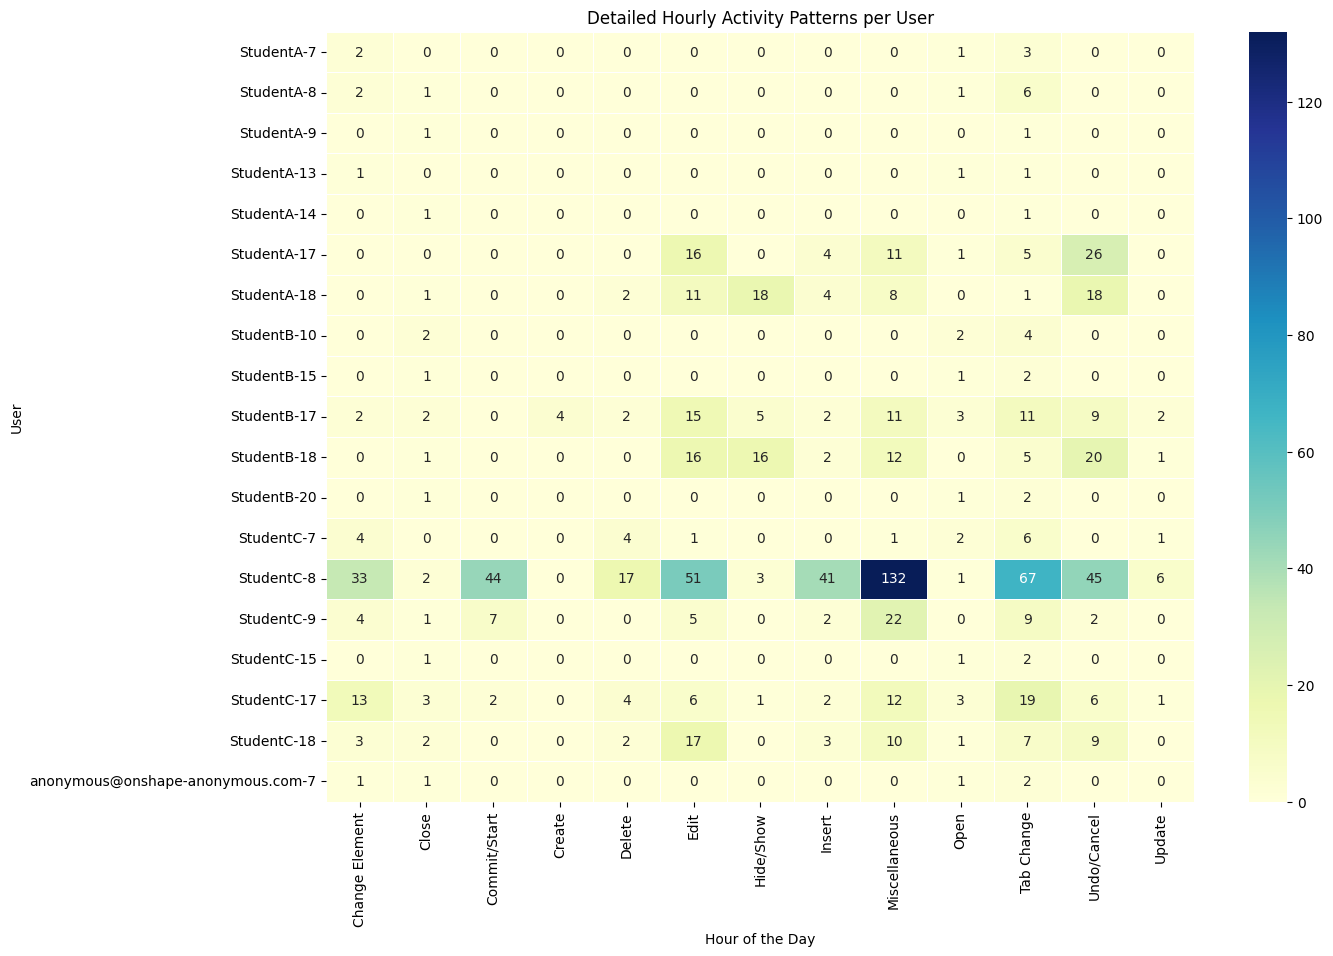

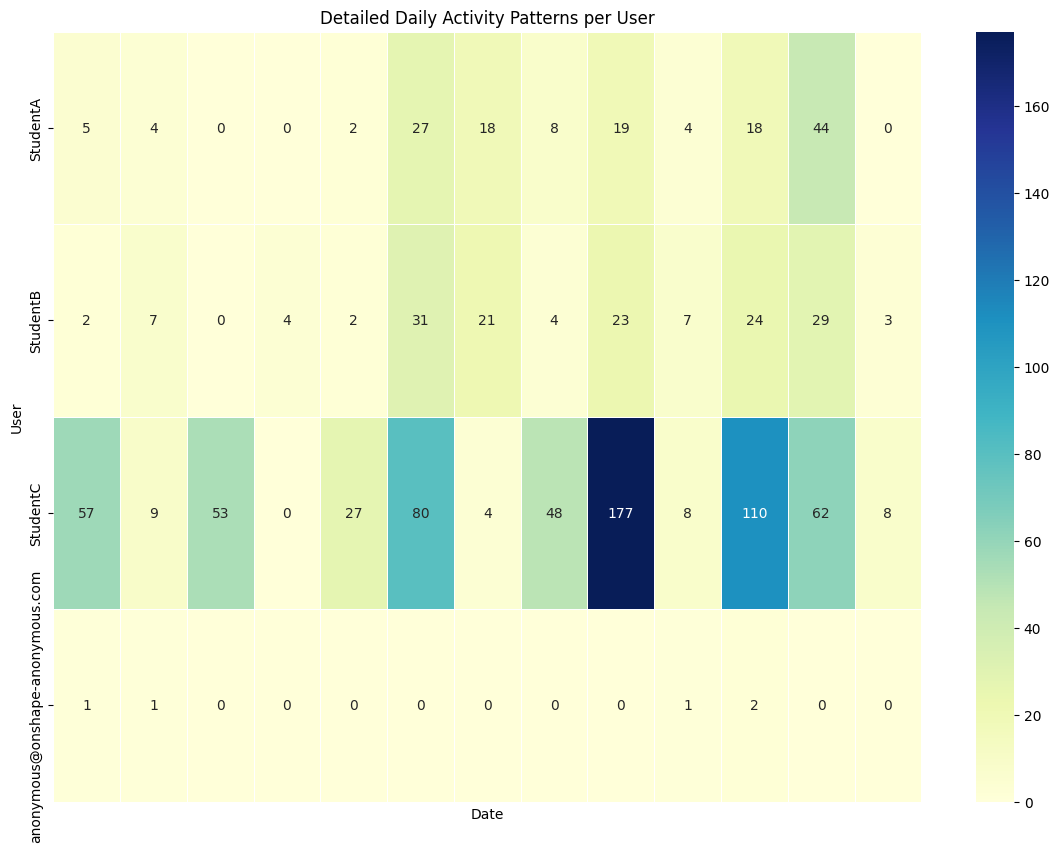

<Figure size 1400x800 with 0 Axes>

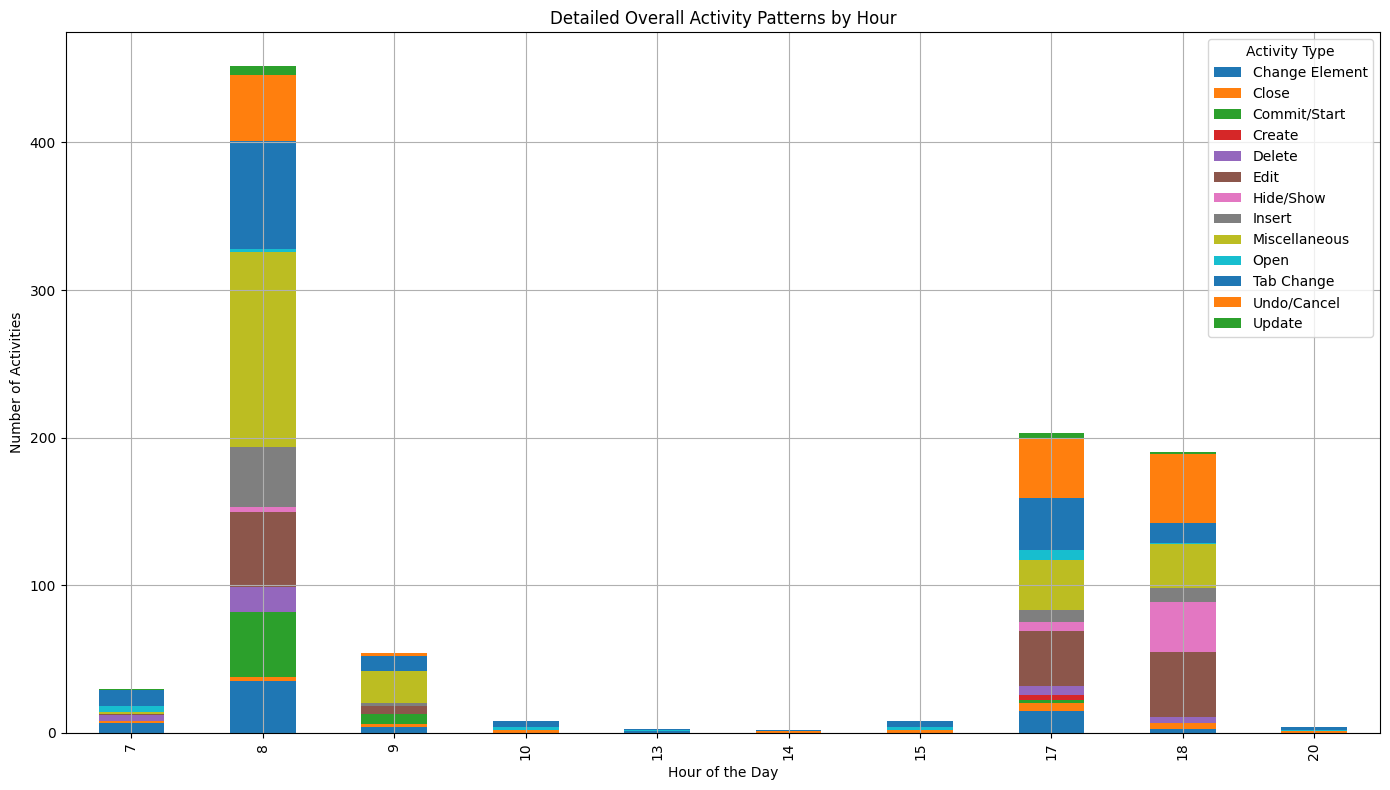

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Extract the hour and date from the 'Time' column
df['Hour'] = df['Time'].dt.hour
df['Date'] = df['Time'].dt.date

# Function to categorize activities in detail
def detailed_categorize_activity(description):
    description = description.lower()
    if 'create' in description:
        return 'Create'
    elif 'delete' in description:
        return 'Delete'
    elif 'tab' in description:
        return 'Tab Change'
    elif 'edit' in description:
        return 'Edit'
    elif 'open' in description:
        return 'Open'
    elif 'close' in description:
        return 'Close'
    elif 'hide' in description or 'show' in description:
        return 'Hide/Show'
    elif 'change' in description:
        return 'Change Element'
    elif 'update' in description:
        return 'Update'
    elif 'import' in description or 'export' in description:
        return 'Import/Export'
    elif 'insert' in description:
        return 'Insert'
    elif 'commit' in description or 'start' in description:
        return 'Commit/Start'
    elif 'cancel' in description or 'undo' in description:
        return 'Undo/Cancel'
    elif 'generic' in description or 'other' in description:
        return 'Other'
    else:
        return 'Miscellaneous'

# Apply the new categorization function
df['DetailedActivity'] = df['Description'].apply(detailed_categorize_activity)

# Group by user and hour to see detailed activity patterns
hourly_detailed_activity = df.groupby(['User', 'Hour', 'DetailedActivity']).size().unstack(fill_value=0)

# Group by user and date to see detailed daily patterns
daily_detailed_activity = df.groupby(['User', 'DetailedActivity']).size().unstack(fill_value=0)

# Plotting detailed hourly activity patterns
plt.figure(figsize=(14, 10))
sns.heatmap(hourly_detailed_activity, cmap="YlGnBu", cbar=True, annot=True, fmt="d", linewidths=.5)
plt.title('Detailed Hourly Activity Patterns per User')
plt.xlabel('Hour of the Day')
plt.ylabel('User')
plt.show()

# Plotting detailed daily activity patterns (without dates on x-axis)
plt.figure(figsize=(14, 10))
sns.heatmap(daily_detailed_activity, cmap="YlGnBu", cbar=True, annot=True, fmt="d", linewidths=.5)
plt.title('Detailed Daily Activity Patterns per User')
plt.xlabel('Date')
plt.ylabel('User')
plt.xticks([])
plt.show()

# Group by detailed activity type to see overall patterns
detailed_activity_patterns = df.groupby(['Hour', 'DetailedActivity']).size().unstack(fill_value=0)

# Plotting detailed overall activity patterns by hour
plt.figure(figsize=(14, 8))
detailed_activity_patterns.plot(kind='bar', stacked=True, figsize=(14, 8), linewidth=0)
plt.title('Detailed Overall Activity Patterns by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Activities')
plt.legend(title='Activity Type')
plt.grid(True)
plt.tight_layout()
plt.show()